In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Input, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('preprocessing/hdb_resale_prepared.csv')
df.drop(['block', 'street_name', 'lease_commence_date', 'remaining_lease_months'], axis=1, inplace=True)

X = df.drop(columns=['resale_price'])  # Features
y = df['resale_price']                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.dtypes)
print(y_train.dtypes)

town_ANG MO KIO                      float64
town_BEDOK                           float64
town_BISHAN                          float64
town_BUKIT BATOK                     float64
town_BUKIT MERAH                     float64
town_BUKIT PANJANG                   float64
town_BUKIT TIMAH                     float64
town_CENTRAL AREA                    float64
town_CHOA CHU KANG                   float64
town_CLEMENTI                        float64
town_GEYLANG                         float64
town_HOUGANG                         float64
town_JURONG EAST                     float64
town_JURONG WEST                     float64
town_KALLANG/WHAMPOA                 float64
town_MARINE PARADE                   float64
town_PASIR RIS                       float64
town_PUNGGOL                         float64
town_QUEENSTOWN                      float64
town_SEMBAWANG                       float64
town_SENGKANG                        float64
town_SERANGOON                       float64
town_TAMPI

In [3]:
def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Single output for price prediction
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [4]:
# Initialize the model
input_dim = X_train.shape[1]
model = build_model(input_dim)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.summary()

c:\Users\vigne\OneDrive\Documents\Projects\HDB_Price_Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,177 (71.00 KB)

 Trainable params: 18,177 (71.00 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
3897/3897 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 97707704320.0000 - mae: 220363.1562 - val_loss: 6300164608.0000 - val_mae: 60931.6172
Epoch 2/100
3897/3897 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 7931102208.0000 - mae: 68105.3906 - val_loss: 5303561728.0000 - val_mae: 55399.2148
Epoch 3/100
3897/3897 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 7015951872.0000 - mae: 63929.4258 - val_loss: 4839228928.0000 - val_mae: 52697.5078
Epoch 4/100
3897/3897 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 6655243776.0000 - mae: 61981.1289 - val_loss: 4497309184.0000 - val_mae: 50318.8320
Epoch 5/100
3897/3897 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 6371589632.0000 - mae: 60354.5859 - val_loss: 4321108992.0000 - val_mae: 48651.4141
Epoch 6/100
3897/3897 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 6128821248.0000 - mae: 58895.2305 - val_loss: 3937801216.0000 - val_mae: 46531.9023
Epoch 7/100
3897/3897 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5868440576.0000 - mae: 57464.4219 - val_loss: 3766875

In [6]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae:.2f}")

model.save('models/hdb_price_prediction_model.keras')

1218/1218 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step
Mean Absolute Error on Test Set: 34941.76


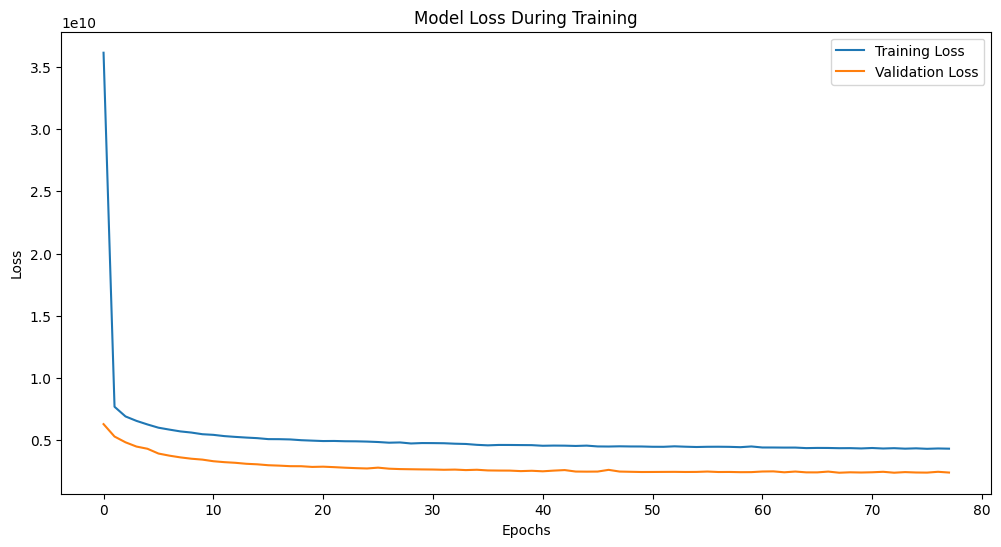

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

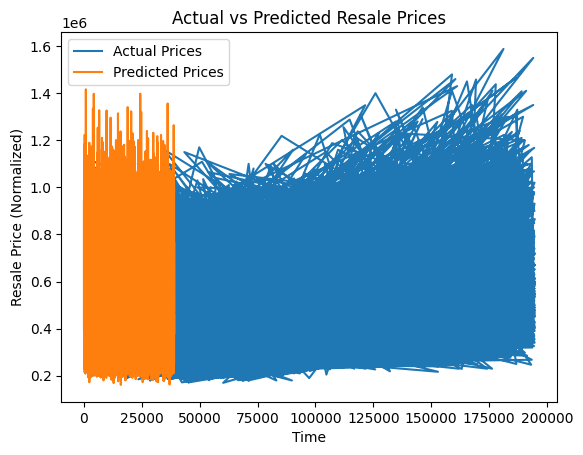

In [9]:
# Plot actual vs predicted prices
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Actual vs Predicted Resale Prices')
plt.xlabel('Time')
plt.ylabel('Resale Price (Normalized)')
plt.legend()
plt.show()

In [18]:
import joblib
from tensorflow.keras.models import load_model

# model = load_model('models/hdb_price_prediction_model.keras')
ohe = joblib.load('models/onehotencoder.pkl')
scaler = joblib.load('models/scaler.pkl')


# Define the feature columns (as used in training)
categorical_cols = ['town', 'flat_type', 'flat_model']
numerical_cols = ['floor_area_sqm', 'average_storey', 'year', 'month_num', 'Distance to school (km)', 'Distance to mrt (km)']

# Function to process input and predict price
def predict_resale_price(user_input):
    # 1. Encode categorical variables
    categorical_input = np.array([user_input[col] for col in categorical_cols]).reshape(1, -1)
    encoded_features = ohe.transform(categorical_input)

    # 2. Scale numerical features
    numerical_input = np.array([[user_input[col] for col in numerical_cols]])
    scaled_features = scaler.transform(numerical_input)

    # 3. Combine the encoded and scaled features
    processed_input = np.concatenate([encoded_features, scaled_features], axis=1)

    # Verify input dimensions
    if processed_input.shape[1] != model.input_shape[-1]:
        raise ValueError(
            f"Input data shape mismatch: Model expects {model.input_shape[-1]} features, "
            f"but received {processed_input.shape[1]} features. Check encoding and scaling."
        )

    # 4. Predict the resale price
    predicted_price = model.predict(processed_input)
    return predicted_price[0][0]  # Return the predicted price

# ---- User Input ----
user_input = {
    'town': 'ANG MO KIO',
    'flat_type': '3 ROOM',
    'flat_model': 'New Generation',
    'floor_area_sqm': 70,
    'average_storey': 15,  # Example: Average of 4 to 6 storey range
    'year': 2023,
    'month_num': 2,
    'Distance to school (km)': 0.5,
    'Distance to mrt (km)': 0.8
}

# Get prediction
try:
    predicted_price = predict_resale_price(user_input)
    print(f"The estimated resale price of the house is: SGD {predicted_price:,.2f}")
except ValueError as e:
    print(f"Error: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The estimated resale price of the house is: SGD 397,602.91


c:\Users\vigne\OneDrive\Documents\Projects\HDB_Price_Prediction\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\vigne\OneDrive\Documents\Projects\HDB_Price_Prediction\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
